In [15]:
import os
import keyring

# API KEY
OPENAI_API_KEY = keyring.get_password('openai', 'key_for_mac')
ANTHROPIC_API_KEY = keyring.get_password('anthropic', 'key_for_mac')
TAVILY_API_KEY = keyring.get_password('tavily', 'key_for_mac')

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY
os.environ['ANTHROPIC_API_KEY'] = ANTHROPIC_API_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

# Set up LangSmith observability
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = "https://api.smith.langchain.com"
os.environ['LANGCHAIN_API_KEY'] = keyring.get_password('langsmith', 'blogbot')
os.environ['LANGCHAIN_PROJECT'] = "proj-blog-bot"

In [16]:
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic

llm_anthropic = ChatAnthropic(model="claude-3-5-haiku-latest", temperature=0.5)
llm_openai = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

In [17]:
from planner import Planner
from researcher import Researcher
from coder import Coder
from writer import Writer
from state import State

state = State()

# nodes
planner = Planner(llm=llm_anthropic)
researcher = Researcher(llm=llm_openai)
coder = Coder(llm=llm_openai)
writer = Writer(llm=llm_anthropic)


In [18]:
from planner import Planner
from researcher import Researcher
from coder import Coder
from writer import Writer

from langgraph.graph import StateGraph, START, END

# Define workflow
builder = StateGraph(State)
builder.add_node("planner", planner.create_node)
builder.add_node("researcher", researcher.create_node)
builder.add_node("coder", coder.create_node)
builder.add_node("writer", writer.create_node)
builder.add_edge(START, "planner")
builder.add_edge("planner", "researcher")
builder.add_edge("researcher", "coder")
builder.add_edge("coder", "writer")
builder.add_edge("writer", END)
graph = builder.compile()

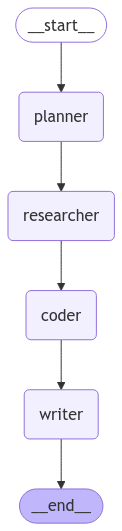

In [19]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
for s in graph.stream(
    {"messages": [("user", "How to make games on the internet")]}
):
    print(s)
    print("----------")

{'planner': {'messages': HumanMessage(content='# Title\n"How to Create Games on the Internet: A Comprehensive Guide for Web Game Developers"\n\n# Objectives\n- Provide a comprehensive overview of web game development\n- Explain different technologies and approaches for creating internet games\n- Help beginners understand the process of making games playable in web browsers\n- Highlight the benefits and challenges of web game development\n\n# Outline\n\n## 1. Introduction to Web Game Development\n- What are web games?\n- Advantages of creating games for the internet\n  - Cross-platform compatibility\n  - Instant play and engagement\n  - Lower development costs\n  - Accessibility\n\n## 2. Technologies for Web Game Development\n### A. JavaScript-Based Solutions\n- Vanilla JavaScript and HTML5\n- Pros and cons\n- Best for simple games\n- Code examples and basic setup\n\n### B. Game Engines and Frameworks\n- Unity WebGL\n- Phaser\n- Three.js\n- Comparison of features\n- When to use each tec